In [1]:
import pandas as pd 

In [2]:
import numpy as np

In [3]:
import seaborn as sns

In [4]:
import matplotlib.pyplot as plt 

In [5]:
import scipy as spicy
from scipy import stats

In [6]:
import glob

In [7]:
import re 

## Summer Academy Dataset FEATURES  
1. Location - the city where the summer academy took place 
2. Track - Apps, Explorers, VR & Games 
3. Week - Duration of the program (1-8 weeks) 
4. Rating - A score from 1-10
5. Schedule Pacing - A rating score that represents the pace of the week 

## Summer Academy 2017 CSV 


In [8]:
# DIR_FOLDER assumes project start at level: DS1/datasets/
DIR_FOLDER = '../../DS1/datasets/SA Feedback Surveys_FINAL'
SUMMER_ACADEMY_2017_CSV = DIR_FOLDER + '/2017/Student Feedback Surveys-Superview.csv'
summer_academy_2017_df = pd.read_csv(SUMMER_ACADEMY_2017_CSV)

### Creating a Promoter, Passive, and Detractor 

In [9]:
# def create_nps_2016(value):
#     if value >= 4:
#         return 'Promoter'
#     elif value <= 2:
#         return 'Detractor'
#     else:
#         return 'Passive'

In [10]:
def create_nps_response(value):
    if value >= 9:
        return 'Promoter'
    elif value >= 7 and value <= 8:
        return 'Passive'
    elif value < 7:
        return 'Detractor'

### Calculating NPS Score 

In [11]:
# NPS = (Promoters - Detractors) / (Promoters + Passives + Detractors)
def calculate_nps_score(dataframe):
 
    try: 
        # Get the total count of promoters, passives, and detractors 
        promoters_count = dataframe[dataframe['NPS Response'] == 'Promoter'].count()
        passives_count = dataframe[dataframe['NPS Response'] == 'Passive'].count()
        detractors_count = dataframe[dataframe['NPS Response'] == 'Detractor'].count()

        # Calculate NPS 
        nps = (promoters_count - detractors_count) / (promoters_count + passives_count + detractors_count)
        return nps
    except:
        raise KeyError('Dataframe doesn\'t contain a key named \'NPS Response')


### Converting Pace (String) into numerical values 

In [12]:
def get_int_from_pace(value):
    if value == 'Way too fast':
        return int(5)
    elif value == 'A little too fast':
        return int(4)
    elif value == 'Just right':
        return int(3)
    elif value == 'A little too slow':
        return int(2)
    elif value == 'Way too slow':
        return int(1)

In [13]:
def change_track_name(value):
    if value == 'Apps, Explorer':
        return 'Intro'
    elif value == 'Games, Explorer':
        return 'Games'
    elif value == 'Apps':
        return 'Apps'
    elif value == 'Games': 
        return 'Games'

In [14]:
# Change the original track names in summer academy week 8 df
def change_track_name_for_week_8(value):
    if value == 'summerApps' or value == 'summerApps (4-week)':
        return 'Apps'
    elif value == 'summerIntro':
        return 'Intro'
    elif value == 'summerGames' or value == 'summerGames (4-week)':
        return 'Games'
    elif value == 'summerVR':
        return 'VR'
    

# Cleaning Summer Academy 2017

In [15]:
summer_academy_2017_df.rename(columns={'Rating (Num)': 'Satisfaction', 'Schedule Pacing':'Pace'}, inplace=True)

In [16]:
def get_week_as_int(value):
    '''Convert the values in the 'Week' into a numerical value (int)'''
    return int(value[-1])

In [17]:
# Loop through each value from the 'Weeks' and convert those values into a num
weeks = []
for week in summer_academy_2017_df['Week']: 
    weeks.append(get_week_as_int(week))

summer_academy_2017_df['Week'] = weeks 

In [18]:
summer_academy_2017_df['Pace'] = summer_academy_2017_df['Pace'].apply(get_int_from_pace)
summer_academy_2017_df['Track'] = summer_academy_2017_df['Track'].apply(change_track_name)

In [19]:
summer_academy_2017_df['Year'] = '2017'

In [20]:
summer_academy_2017_df.dropna(subset=['Pace'], inplace=True)

In [21]:
summer_academy_2017_df['Pace']=summer_academy_2017_df['Pace'].astype('int64')
summer_academy_2017_df['Satisfaction']=summer_academy_2017_df['Satisfaction'].astype('int64')
summer_academy_2017_df.drop(columns=['ID'],inplace=True)

In [22]:
summer_academy_2017_df['NPS Response'] = summer_academy_2017_df['Satisfaction'].apply(create_nps_response)

In [23]:
summer_academy_2017_df

,Location,Track,Week,Satisfaction,Pace,Year,NPS Response
0,San Francisco,Intro,1,3,3,2017,Detractor
1,Los Angeles,Apps,1,4,4,2017,Detractor
2,San Francisco,Games,1,4,1,2017,Detractor
3,NaN,None,2,4,4,2017,Detractor
4,New York City,Intro,1,4,3,2017,Detractor
5,Redwood City,Apps,1,5,3,2017,Detractor
6,Los Angeles,Apps,7,5,3,2017,Detractor
7,San Francisco,Apps,1,5,2,2017,Detractor
8,Santa Clara,Apps,1,5,2,2017,Detractor
9,Santa Clara,Apps,1,5,3,2017,Detractor


# Cleaning & Aggregating Summer Academy 2016 datasets

In [24]:
# Columns: Track, Week, Location, Satisfaction, Pace 
columns = ['Track', 'Week', 'Location', 'Satisfaction', 'Pace']

In [25]:
summer_academy_2016_df = pd.DataFrame(columns=columns)

In [26]:
# Collect CSV files 
pattern = DIR_FOLDER + '/2016/*.csv'
csv_files = glob.glob(pattern)

In [27]:
 
# Iterate over cvs_files
for csv in csv_files:
    # Create an empty DataFrame 
    frames = pd.DataFrame()
    
    pattern = re.search(pattern='Anon Week (\d) Feedback - (.*)\.csv', string=csv)
    if pattern is None:
        continue
        
    # Get the number of the week and location from the filename     
    week = pattern.group(1)
    location = pattern.group(2)
    
    # Read a file(CSV) and extract the values from each column 
    df = pd.read_csv(csv)
    
    # Grab the values from the Satisfaction column in the original dataset
    
    try: 
        frames['Satisfaction'] = df['How would you rate your overall satisfaction with the Summer Academy this week?']
    except KeyError:
        frames['Satisfaction'] = np.nan
        
    try: 
        frames['Pace'] = df['How well are the tutorials paced?']
    except KeyError:
        frames['Pace'] = np.nan 
        
    try:
        frames['Pace'] = df['How well is the schedule paced?']
    except KeyError:
        frames['Pace'] = np.nan 
        
    try: 
        frames['Track'] = df['What track are you in?']
    except KeyError: 
        frames['Track'] = np.nan 
        
    frames['Week'] = week
    frames['Location'] = location 
            
    
    summer_academy_2016_df = summer_academy_2016_df.append(frames, ignore_index=True, sort=True)
        
     

In [28]:
summer_academy_2016_df['Year'] = '2016'

In [29]:
# Removing unwanted data from the dataset 
for row in range(len(summer_academy_2016_df)-1):
    drop_row = summer_academy_2016_df.index[row]
    if summer_academy_2016_df['Satisfaction'][drop_row] == '#REF!' and summer_academy_2016_df['Pace'][drop_row] == '#REF!':
        summer_academy_2016_df.drop(index=drop_row,inplace=True) 

In [30]:
cities2016_key = {'TPE':'Taipei', 'TYO':'Tokyo' , 'SG':'Singapore', 'HK': 'Hong Kong', 'NY': 'New York City', 'SF':'San Francisco', 'LA':'Los Angeles', 'SV':'Sunnyvale'}
summer_academy_2016_df['Location'] = summer_academy_2016_df['Location'].replace(cities2016_key)

# Remove NaN values and replace them with a '0'
summer_academy_2016_df['Pace']=summer_academy_2016_df['Pace'].fillna(0).astype('int64')
summer_academy_2016_df['Track']=summer_academy_2016_df['Track'].fillna('N/A')

##  Convert values in each column into strings and integers

In [31]:
 
summer_academy_2016_df['Location']=summer_academy_2016_df['Location'].astype('str')

In [32]:
summer_academy_2016_df['Track']=summer_academy_2016_df['Track'].astype('str')

In [33]:
summer_academy_2016_df['Satisfaction']=summer_academy_2016_df['Satisfaction'].astype('int64')

In [34]:
summer_academy_2016_df['Week']=summer_academy_2016_df['Week'].astype('int64')

In [35]:
# Double to Satisfaction scores
summer_academy_2016_df['Satisfaction'] = summer_academy_2016_df['Satisfaction'] * 2

In [36]:
summer_academy_2016_df['NPS Response'] = summer_academy_2016_df['Satisfaction'].apply(create_nps_response)

In [37]:
summer_academy_2016_df

,Location,Pace,Satisfaction,Track,Week,Year,NPS Response
0,Taipei,3,6,N/A,7,2016,Detractor
1,Taipei,3,8,N/A,7,2016,Passive
2,Taipei,3,8,N/A,7,2016,Passive
3,Taipei,4,8,N/A,7,2016,Passive
4,Taipei,4,10,N/A,7,2016,Promoter
5,Taipei,3,8,N/A,7,2016,Passive
6,Taipei,3,8,N/A,7,2016,Passive
7,Taipei,3,10,N/A,7,2016,Promoter
8,Taipei,3,10,N/A,7,2016,Promoter
9,Taipei,3,10,N/A,7,2016,Promoter


In [38]:
summer_academy_2016_df.dtypes

Location        object
Pace             int64
Satisfaction     int64
Track           object
Week             int64
Year            object
NPS Response    object
dtype: object

# Summer Academy 2016 week 8 

In [39]:
summer_academy_week_8 = DIR_FOLDER + '/2016/Week 8 Feedback (2016, incomplete) - results.csv'
summer_academy_week_8_df = pd.read_csv(summer_academy_week_8)
summer_academy_week_8_df.rename(columns={
    'How likely is it that you would recommend the Make School Summer Academy to a friend?':'Satisfaction',
    'track':'Track',
    'location':'Location'
},inplace=True)

In [40]:
summer_academy_week_8_df.drop(columns=['#', 'Start Date (UTC)','Submit Date (UTC)', 'Network ID'],inplace=True)

In [41]:
# Change track names 
summer_academy_week_8_df['Track'] = summer_academy_week_8_df['Track'].apply(change_track_name_for_week_8)
summer_academy_week_8_df['NPS Response'] = summer_academy_week_8_df['Satisfaction'].apply(create_nps_response)
summer_academy_week_8_df['Week'] = 8
summer_academy_week_8_df['Year'] = '2016'
summer_academy_week_8_df.dtypes

Satisfaction     int64
Location        object
Track           object
NPS Response    object
Week             int64
Year            object
dtype: object

## Concatenate Summer Academy week 8 DataFrame with Summer Academy 2016 DataFrame

In [42]:
summer_academy_2016_df = summer_academy_2016_df.append(summer_academy_week_8_df, sort=True)

In [43]:
summer_academy_2016_df

,Location,NPS Response,Pace,Satisfaction,Track,Week,Year
0,Taipei,Detractor,3.0,6,N/A,7,2016
1,Taipei,Passive,3.0,8,N/A,7,2016
2,Taipei,Passive,3.0,8,N/A,7,2016
3,Taipei,Passive,4.0,8,N/A,7,2016
4,Taipei,Promoter,4.0,10,N/A,7,2016
5,Taipei,Passive,3.0,8,N/A,7,2016
6,Taipei,Passive,3.0,8,N/A,7,2016
7,Taipei,Promoter,3.0,10,N/A,7,2016
8,Taipei,Promoter,3.0,10,N/A,7,2016
9,Taipei,Promoter,3.0,10,N/A,7,2016


In [61]:
summer_academy_2016_2017_df = pd.concat((summer_academy_2016_df, summer_academy_2017_df), ignore_index=True, sort=True)

# SUMMER ACADEMY 2016 & 2017

### Dataset Features (Columns)
1. Track - Apps, Intro, VR, or Games
2. Week - Weeks 1-8 of the program  
3. Location - Area of each Summer Academy Program 
4. Satisfaction - Rating from 1-5
5. Pace - Too Slow (1), A little too fast (2), Just right(3), A little too fast(4), Too Fast(5)
6. NPS Response - Promoter, Passive, and Detractor 
7. Year - 2016--2017 

### Combine both Summer Academy Dataframes 

In [63]:
summer_academy_2016_2017_df = pd.concat((summer_academy_2016_df, summer_academy_2017_df), ignore_index=True, sort=True)

In [82]:
sa_nps_2016 = summer_academy_2016_2017_df[(summer_academy_2016_2017_df['Year']=='2016') & (summer_academy_2016_2017_df['NPS Response']=='Promoter')]

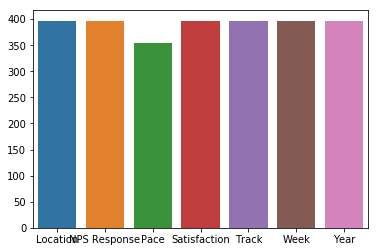

In [84]:
promoter = sa_nps_2016[sa_nps_2016['NPS Response']=='Promoter'].count()
sns.barplot(x=promoter.index,y=promoter.values)


#### 1. What track were students most satisfied with? 
#### 2. What locations had the highest ratings? 


### 3. What is the NPS for 2016 & 2017?

In [44]:
summer_academy_2016_nps = calculate_nps_score(summer_academy_2016_df)
display(summer_academy_2016_nps * 100)

Location        24.621594
NPS Response    24.621594
Pace            22.462203
Satisfaction    24.621594
Track           24.621594
Week            24.621594
Year            24.621594
dtype: float64

In [45]:
summer_academy_2017_nps = calculate_nps_score(summer_academy_2017_df)
display(summer_academy_2017_nps.Satisfaction * 100)

44.06896551724138

### Summer Academy 2016 Satisfaction Review 

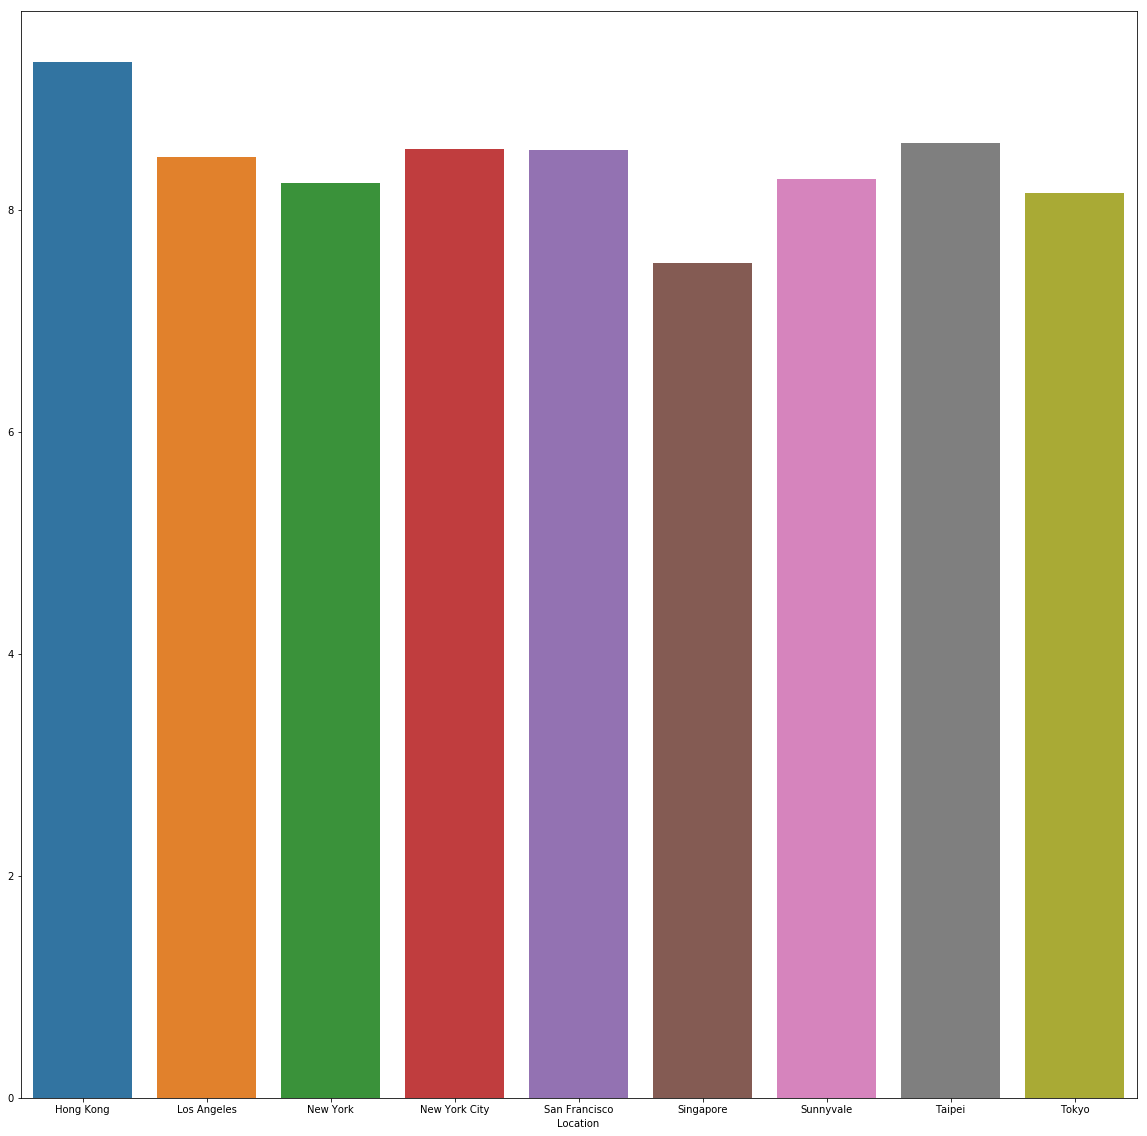

In [46]:
sa2016 = summer_academy_2016_df.groupby(['Location']).Satisfaction.mean()

plt.subplots(figsize=(20, 20))
sns.barplot(x=sa2016.index, y=sa2016.values)

### Summer Academy 2017 Satisfaction Review 

Location
Atlanta          9.121212
Beijing          8.948718
Chicago          8.485714
Hong Kong        7.181818
Los Angeles      8.773585
New York City    8.275758
Oakland          8.531915
Redwood City     8.327586
San Francisco    8.458333
Santa Clara      8.318408
Tokyo            8.246154
Washington DC    8.170213
Name: Satisfaction, dtype: float64

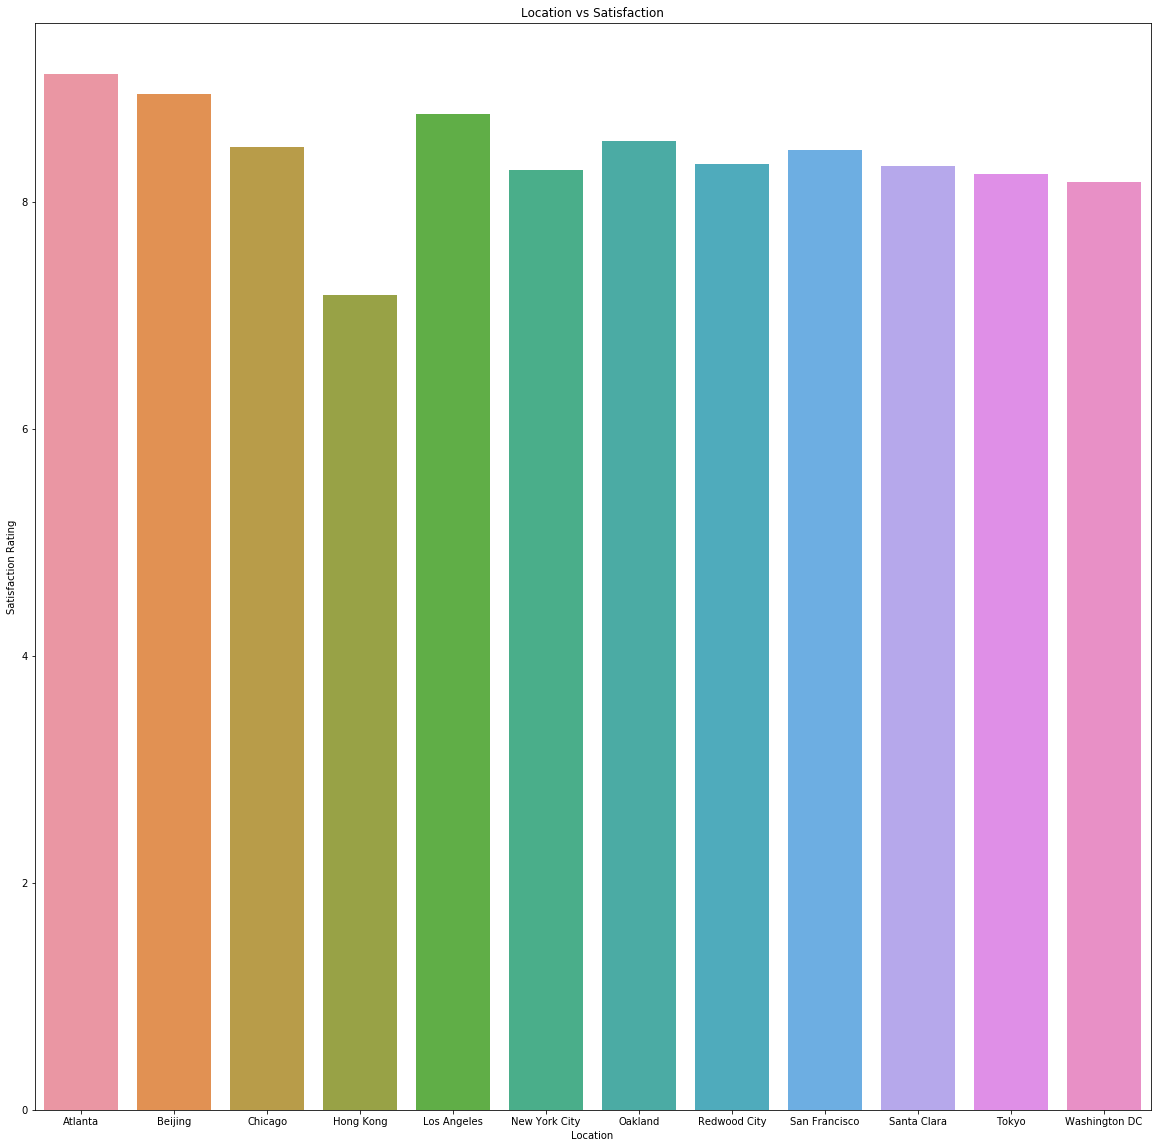

In [47]:
sa2017 = summer_academy_2017_df.groupby(['Location']).Satisfaction.mean()
display(sa2017)

plt.subplots(figsize=(20, 20))
fig = sns.barplot(x=sa2017.index, y=sa2017.values)
plt.xlabel("Location")
plt.ylabel("Satisfaction Rating")
plt.title("Location vs Satisfaction") # You can comment this line out if you don't need title
plt.show(fig)

In [48]:
# Attempt at normalizing ratings to better see distribution

original_values = sa2017.values

data_mean = np.mean(original_values)
data_std = np.std(original_values)

z_scores = list()
for value in original_values:
    z = (value - data_mean) / data_std
    z_scores.append(z)
    
for iterator in range(len(z_scores)):
    print(original_values[iterator], ": ", z_scores[iterator])
    
print("\n\nData's mean is: ", data_mean)

spicy.stats.norm.cdf(-2.6360191171083556)

9.121212121212121 :  1.5493435204170174
8.948717948717949 :  1.1770877089063478
8.485714285714286 :  0.1778898704421857
7.181818181818182 :  -2.6360191171083556
8.773584905660377 :  0.7991370099171848
8.275757575757575 :  -0.2752130043792003
8.53191489361702 :  0.277594367924267
8.327586206896552 :  -0.16336279596257353
8.458333333333334 :  0.11879965016908871
8.318407960199005 :  -0.1831701646593662
8.246153846153845 :  -0.3391001504087354
8.170212765957446 :  -0.5029868952578258


Data's mean is:  8.403284502086473


0.004194250270583964

### 2016 Summer Academy Weekly Performance 

In [49]:
summer_academy_2016_df[summer_academy_2016_df["Location"] == location]

,Location,NPS Response,Pace,Satisfaction,Track,Week,Year


In [ ]:
# Grabbing SAWP score for each location
LOCATIONS = summer_academy_2016_df["Location"].unique()

ITERATOR = int()
for location in LOCATIONS:
    ITERATOR += 1
    print(ITERATOR, " | ", location, ": ", len(summer_academy_2016_df[summer_academy_2016_df["Location"] == location]))
    
    # Create dummy dfs 
    # Store to dummy list [df1, df2, df3, ...]
    # Loop through dummy list and functionally get Satisfaction means


In [ ]:
sawp2016 = summer_academy_2016_df.groupby(['Week']).Satisfaction.mean()
summer_academy_2016_df.groupby(['Week']).Satisfaction.count()
sns.pointplot(x=sawp2016.index, y=sawp2016.values, hue="Location")

plt.ylim(1, 10)

### 2017 Summer Academy Weekly Performance 

In [59]:

# def create_bar_plot(frame):
    
#     if frame is None:
#         return pd.DataFrame()
    
#     index = frame['Week']

0     7
1     7
2     7
3     7
4     7
5     7
6     7
7     7
8     7
9     7
10    7
11    6
12    6
13    6
14    6
15    6
16    6
17    6
18    6
19    6
20    6
21    6
22    6
23    6
24    1
25    1
26    1
27    1
28    1
29    1
     ..
35    8
36    8
37    8
38    8
39    8
40    8
41    8
42    8
43    8
44    8
45    8
46    8
47    8
48    8
49    8
50    8
51    8
52    8
53    8
54    8
55    8
56    8
57    8
58    8
59    8
60    8
61    8
62    8
63    8
64    8
Name: Week, Length: 991, dtype: int64

### Summer Academy 2016 Track vs NPS

In [ ]:
def create_bar_plot(frame):
    
    if frame is None:
        return pd.DataFrame()
    
    index = frame['Track']
    nps = frame[frame['NPS Response'] == 'Promoter'].mean()
    
    
    
    
summer_academy_2016_df.plot.line()

### Summer Academy 2017 Track vs NPS